In [72]:
import pandas as pd
import seaborn as sbs
import numpy as np
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv("Job_Placement_Data.csv")

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ssc_percentage,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_percentage,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_percentage,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
emp_test_percentage,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_percent,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89


In [74]:
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


<Axes: xlabel='ssc_percentage', ylabel='Density'>

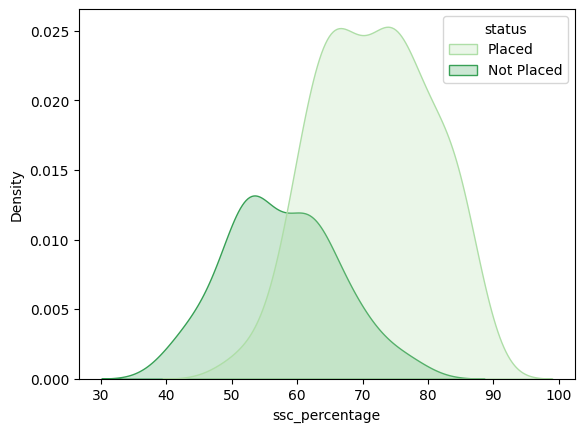

In [76]:
numerical_features = df.select_dtypes(exclude="object").columns.tolist()
categorical_features = df.select_dtypes(exclude="float64").columns.tolist()
#df['status'] = df['status'].map({'Placed': 1, 'Not Placed': 2})

sbs.kdeplot(data=df,x=numerical_features[0],hue="status",palette="Greens",fill=True)
#sbs.jointplot(x='ssc_percentage', y='status', data=df, color='green', kind='hex')

Da queso grafico si può notare che la variabile ssc_percentage influisce tanto, in quanto più è alto il valore è più c'è possibilità di essere piazzati. Alla fine abbiamo deciso di eliminarla in quanto non necessario per il nostro modello. 

Adesso calcoliamo il grado d'influenza della variabile hsc_percentage:

<Axes: xlabel='hsc_percentage', ylabel='Density'>

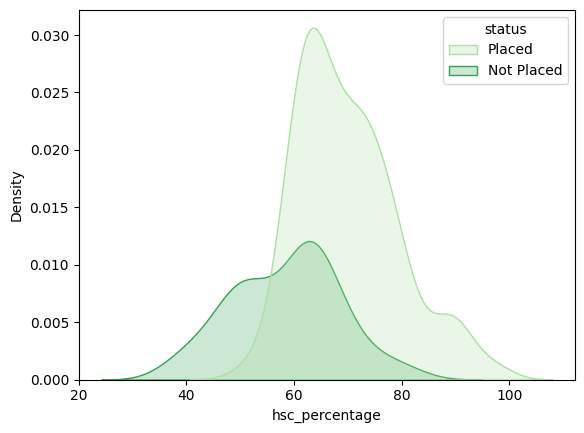

In [77]:
sbs.kdeplot(data=df,x=numerical_features[1],hue="status",palette="Greens",fill=True)

Da questo grafico invece si può vedere che la variabile hsc_percentage influisce, quindi abbiamo deciso di non rimuoverla.

Adesso valutiamo l'influenza della variabile degree_percentage:

<Axes: xlabel='degree_percentage', ylabel='Density'>

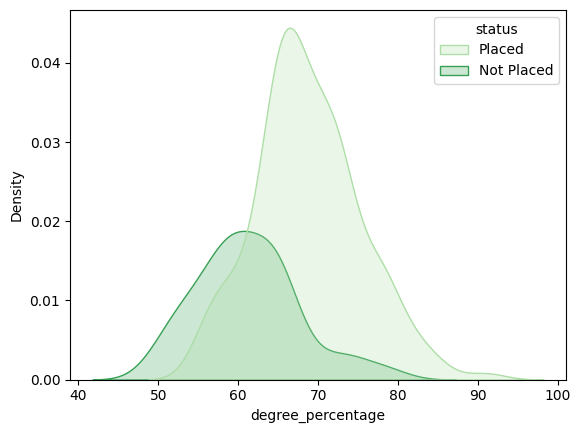

In [78]:
sbs.kdeplot(data=df,x=numerical_features[2],hue="status",palette="Greens",fill=True)

Da questo grafico si nota che la variabile degree_percentage influisce discretamente, ma nonostante questo non la elimineremo.

Continuiamo adesso valutando l'influenza della variabile emp_test_percentage:

<Axes: xlabel='emp_test_percentage', ylabel='Density'>

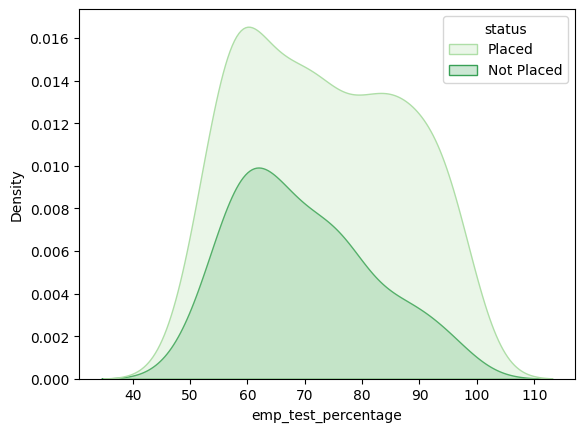

In [79]:
sbs.kdeplot(data=df,x=numerical_features[3],hue="status",palette="Greens",fill=True)

Da questo grafico si nota che la variabile emp_test_percentage influisce discretamente, nonostante questo riteniamo di non eliminare questa variabile.

Continuiamo adesso valutando l'influenza della variabile mba_percent

<Axes: xlabel='mba_percent', ylabel='Density'>

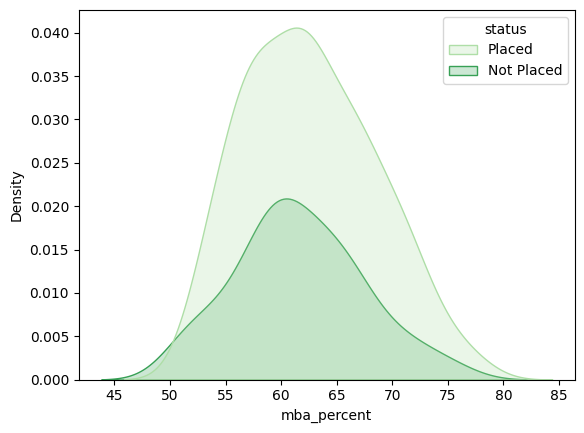

In [80]:
sbs.kdeplot(data=df,x=numerical_features[4],hue="status",palette="Greens",fill=True)

Da questo grafico si può notare che la variabile mba_percent influisce discretamente, nonostante questo abbiamo deciso di eliminarla per due motivi:
- 

<Axes: xlabel='gender', ylabel='count'>

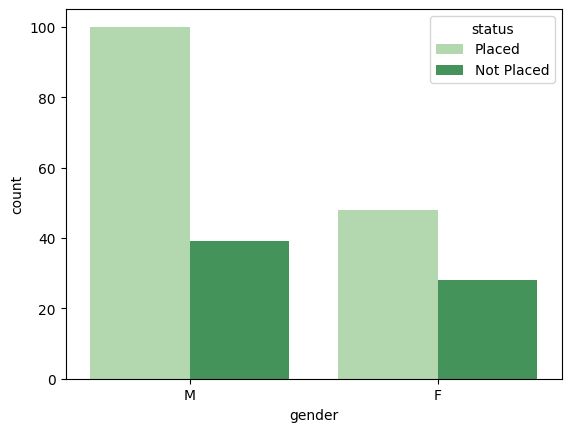

In [81]:
sbs.countplot(data=df,x=categorical_features[0],hue="status",palette="Greens")

Da questo grafico si può notare che il gender influensce di molto. Oltrettutto ci fa capire che le predizioni del nostro modello di machine learning sono influenzate in modo negativo eticamente, causando una discrimazione per un sesso rispetto ad un altro. Abbiamo così deciso di eliminare questa variabile dal dataset per evitare questo tipo di problema, rendendolo quanto più neutrale possibile.

Adesso calcoliamo il grado di influenza della variabile ssc_board

<Axes: xlabel='ssc_board', ylabel='count'>

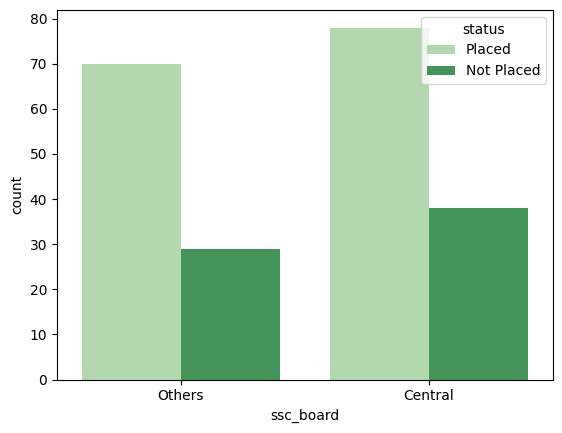

In [82]:
sbs.countplot(data=df,x=categorical_features[1],hue="status",palette="Greens")

<Axes: xlabel='hsc_board', ylabel='count'>

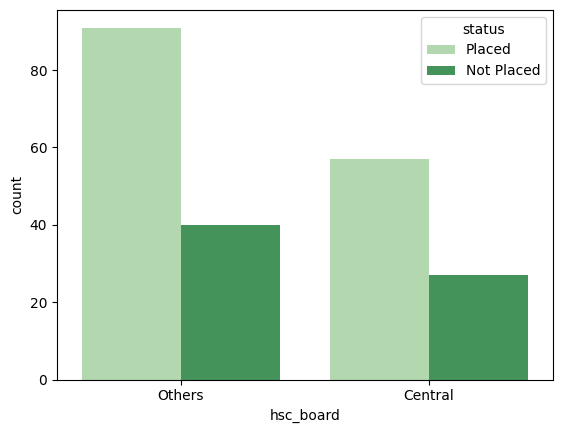

In [83]:
sbs.countplot(data=df,x=categorical_features[2],hue="status",palette="Greens")

<Axes: xlabel='hsc_subject', ylabel='count'>

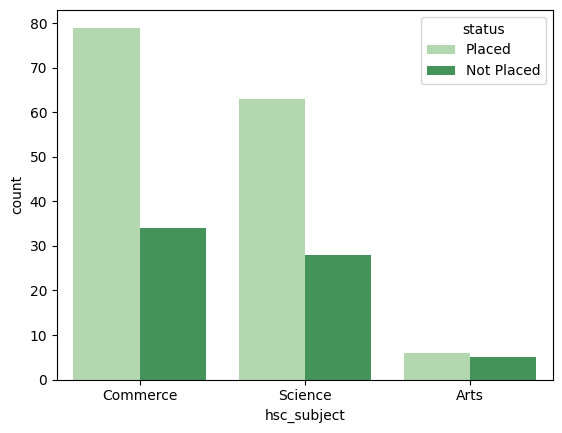

In [84]:
sbs.countplot(data=df,x=categorical_features[3],hue="status",palette="Greens")

<Axes: xlabel='undergrad_degree', ylabel='count'>

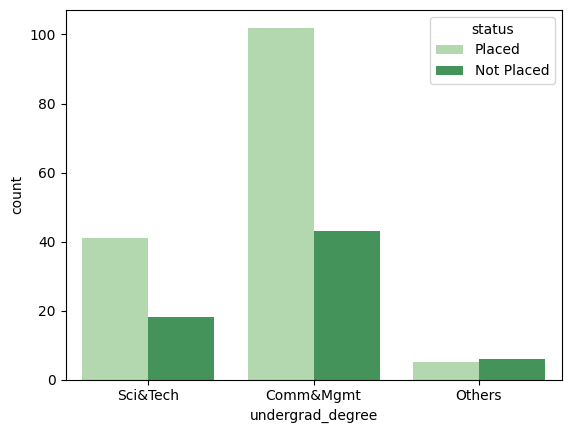

In [85]:
sbs.countplot(data=df,x=categorical_features[4],hue="status",palette="Greens")

<Axes: xlabel='work_experience', ylabel='count'>

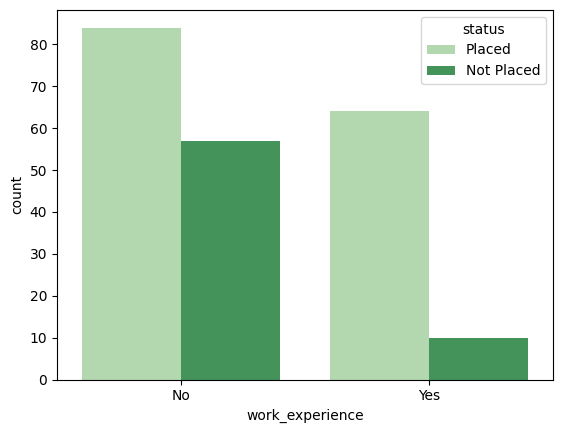

In [86]:
sbs.countplot(data=df,x=categorical_features[5],hue="status",palette="Greens")

<Axes: xlabel='specialisation', ylabel='count'>

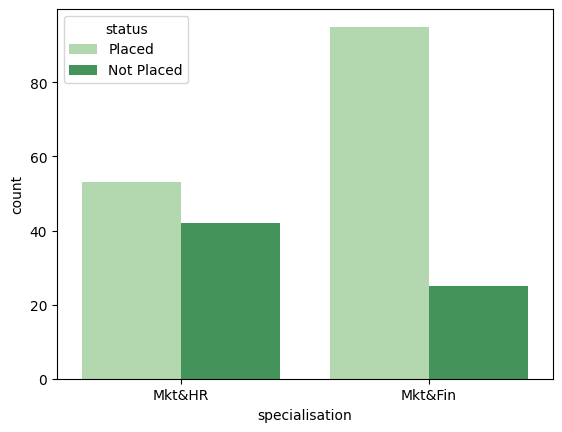

In [87]:
sbs.countplot(data=df,x=categorical_features[6],hue="status",palette="Greens")